# <center>Project</center>  <center>Fall 2021</center> 


<br/><br/><br/>
**Title:**: Automated Liver Segmentation
<br/><br/><br/><br/>

**Name**: MAHRUKH SALEEM

**Roll Number**: PHDCSF21M508



1. How Mask_RCNN works?


Answer: Mask RCNN is a deep learning model that is used to detect, segment and classify different objects in an image, it give three things as output i.e. object bounding box, class to which particular object belongs and mask. Firstly, it extracts features using any CNN which is the backbone network. Then  it identify proposed regions where object might exists which is the task of Region Proposed Network and the proposed regions are the feature volumes. Then it aligns all the feature volumes knows as ROI Align. After which classification and bounding box is predicted for objects as well as masks are generated using pixel level classification against object and background.

2. The data has been annotated using https://www.makesense.ai which is an  annotation tool. Annotated image has been shown below

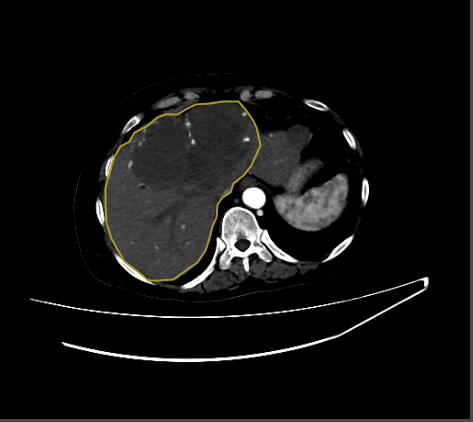

In [ ]:
import cv2
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/recitation8/annotatedsample.png')
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(image)

3. Implementation of Mask_RCNN 

**Dataset classes:**1

**Dataset size:**719

**Epochs**:5

**Batch_size:** 8 with 500 step size

**Loss:** loss: 0.143 - val_loss: 0.363


In [1]:
!nvidia-smi

Sun Mar 13 12:53:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
tf.version.VERSION


'1.15.2'

In [4]:
!pip install --upgrade h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/recitation8/")


In [6]:
cd /content/drive/MyDrive/Colab Notebooks/recitation8/

/content/drive/MyDrive/Colab Notebooks/recitation8


In [7]:
!ls

 annotatedsample.png
 annotations.json
'Annoted img.png'
 dataset.zip
 images.jpg
 img00015.png
 inputs
 labels_liver-ct-scans.json
 Mask_RCNN
 new_png.zip
 new_results_liver
'PHDCSF21M508_MAHRUKH SALEEM_Project.ipynb'
'PHDCSF21M508_MAHRUKH SALEEM_Test8_CS570_ComputerVision.ipynb'
 png.zip
 results_liver


In [8]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [9]:
sys.path.append("/content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/demo")

In [10]:
from train_mask_rcnn_demo import *
%matplotlib inline

VERS 0.2


Using TensorFlow backend.


In [11]:
images_path="png.zip"
annotations_path="labels_liver-ct-scans.json"

extract_images(images_path,"/png")

Extracted: 719 images


In [12]:
dataset_train=load_image_dataset(annotations_path,"/png","train")
dataset_val=load_image_dataset(annotations_path,"/png","val")
class_number=dataset_train.count_classes()
print('train:%d' % len(dataset_train.image_ids))
print('validation:%d' % len(dataset_val.image_ids))
print("Classes: {}",format(class_number))

Annotation json path:  labels_liver-ct-scans.json
Annotation json path:  labels_liver-ct-scans.json
train:632
validation:78
Classes: {} 1


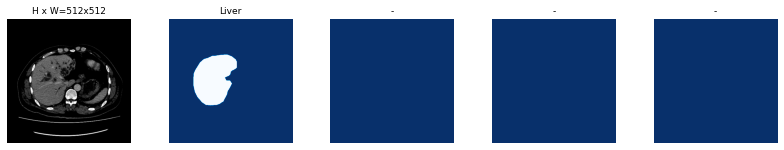

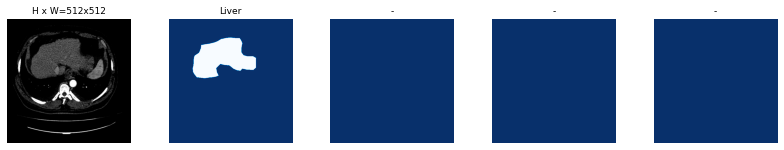

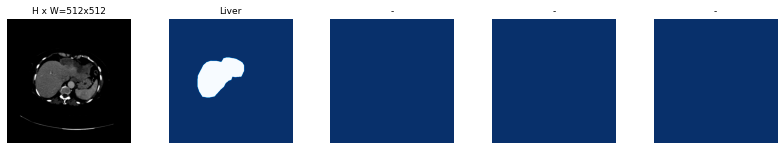

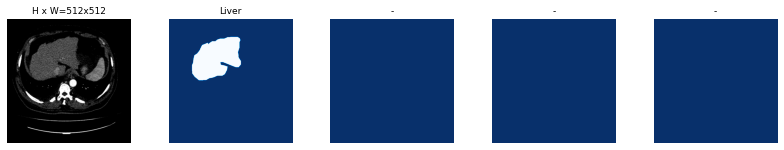

In [ ]:
display_image_samples(dataset_train)

In [13]:
config=CustomConfig(class_number)
model=load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
train_head(model,dataset_train,dataset_val,config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_c

Results on testing images.

In [14]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [ ]:

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/recitation8/inputs/volume1a00021.dcm.png')
checkpoint_path='/content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5'
test_model,inference_config=load_inference_model(num_classes=1, model_path=checkpoint_path)
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r=test_model.detect([image])[0]



Loading weights from  /content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [15]:

##### saving segmented liver images in a folder 
root_dir='/content/drive/MyDrive/Colab Notebooks/recitation8/new_png'
import os
import cv2
checkpoint_path='/content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5'
test_model,inference_config=load_inference_model(num_classes=1, model_path=checkpoint_path)
images=os.listdir(root_dir)
for i, image_name in enumerate(images):
  if image_name.endswith(".png"):
    l=len(image_name)
    
    im=image_name[:l-4]
    img = cv2.imread(root_dir+"/"+image_name,1)
    image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r=test_model.detect([image])[0]
    object_count=len(r["class_ids"])
    colors=random_colors(object_count)
    for i in range (object_count):
      mask=r["masks"][:,:,i]
      contours=get_mask_contours(mask)
      for cnt in contours:
        cv2.polylines(img,[cnt],True,colors[i],2)
        img=draw_mask(img,[cnt],colors[i])
        mask = r['masks']
        mask = mask.astype(int)
        mask.shape
    for i in range(mask.shape[2]):
        temp=image
        for j in range(temp.shape[2]):
          temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
        cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/recitation8/new_results_liver/' + image_name + '.png' ,temp)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5
Re-starting from epoch 5





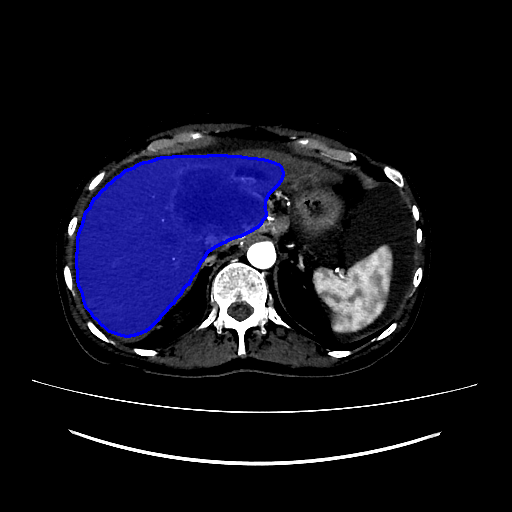

In [ ]:
object_count=len(r["class_ids"])
colors=random_colors(object_count)
for i in range (object_count):
  mask=r["masks"][:,:,i]
  contours=get_mask_contours(mask)
  for cnt in contours:
    cv2.polylines(img,[cnt],True,colors[i],2)
    img=draw_mask(img,[cnt],colors[i])
    
cv2_imshow(img)



In [ ]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(512, 512, 1)

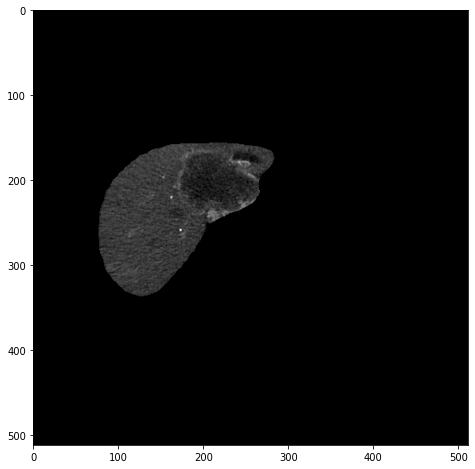

In [ ]:

for i in range(mask.shape[2]):
    temp=cv2.imread('/content/drive/MyDrive/Colab Notebooks/recitation8/inputs/volume1a00021.dcm.png')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    fig = plt.figure(figsize=(8,8))
    plt.imshow(temp)
    
    


